In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


%matplotlib inline

In [4]:
import kagglehub

path = kagglehub.dataset_download("ayusha232/fuelconsumptioncsv")
print(path)

C:\Users\Behbab\.cache\kagglehub\datasets\ayusha232\fuelconsumptioncsv\versions\1


In [15]:
df = pd.read_csv(r"\Users\Behbab\Datasets\FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


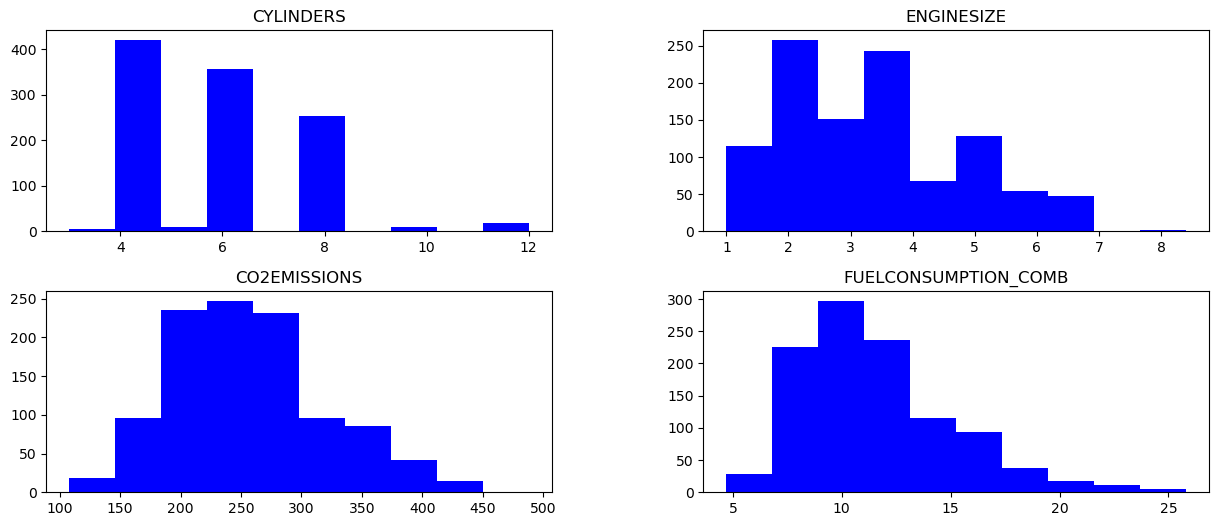

In [17]:
viz = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(figsize=(15, 6), grid=False, color="blue")
plt.show()

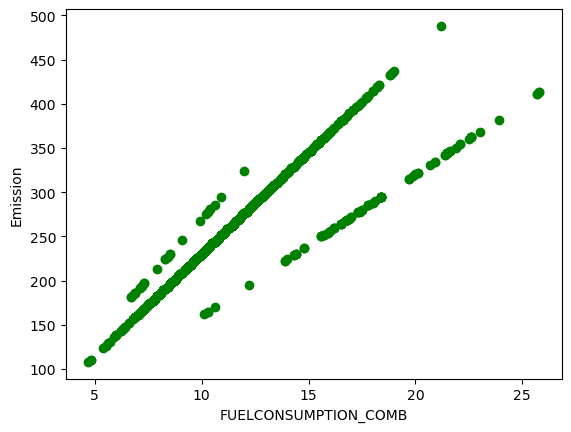

In [27]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [19]:
df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [21]:
y = df["CO2EMISSIONS"]
x = df[['ENGINESIZE', "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB_MPG"]]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

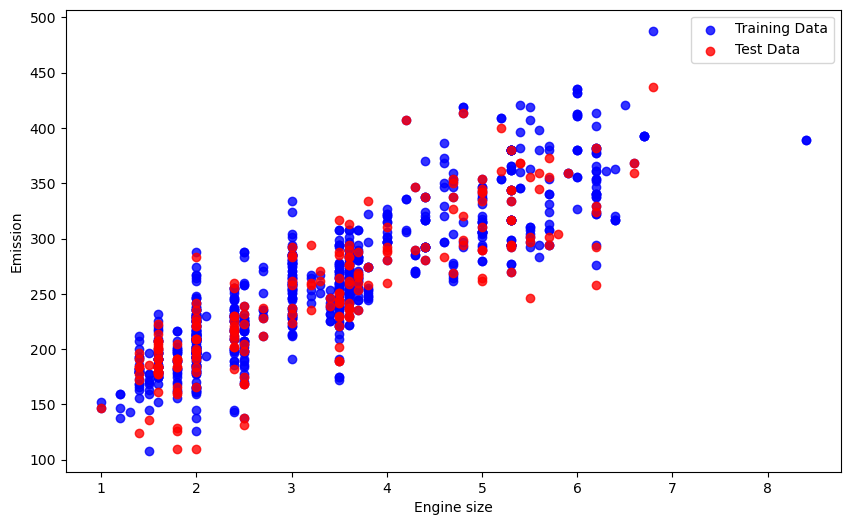

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(x_train.ENGINESIZE, y_train,  color='blue', label="Training Data", alpha=0.8)
plt.scatter(x_test.ENGINESIZE, y_test,  color='red',label="Test Data", alpha=0.8)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

## Simple Linear Regression (Engine Size)

In [25]:
regr = LinearRegression()
regr.fit(x_train[["ENGINESIZE"]], y_train)

LinearRegression()

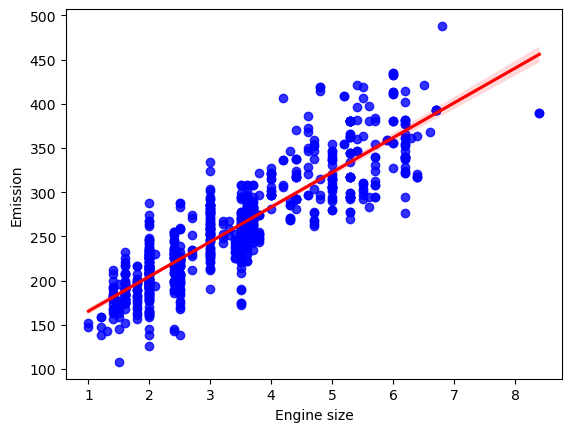

In [27]:
sns.regplot(x=x_train[["ENGINESIZE"]], y=y_train,  color='blue', line_kws=dict(color="r"))
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [29]:
y_hat = regr.predict(x_test[["ENGINESIZE"]])

print("R2:", r2_score(y_test, y_hat), 
      "\nMSE:", mean_squared_error(y_test, y_hat), 
      "\nMAE:", mean_absolute_error(y_test, y_hat),
     "\nRMSE:", root_mean_squared_error(y_test, y_hat))

R2: 0.7201153918073576 
MSE: 1181.528809303555 
MAE: 25.56889045602356 
RMSE: 34.37337355139229


## Simple Linear Regression (Fuel Consumption Comb.)

In [31]:
regr.fit(x_train[['FUELCONSUMPTION_HWY']], y_train)
y_hat0= regr.predict(x_test[['FUELCONSUMPTION_HWY']])
print("R2:", r2_score(y_test, y_hat0), 
      "\nMSE:", mean_squared_error(y_test, y_hat0), 
      "\nMAE", mean_absolute_error(y_test, y_hat0),
     "\nRMSE:", root_mean_squared_error(y_test, y_hat0))

R2: 0.7658933264232992 
MSE: 988.2779230600316 
MAE 24.678615452612807 
RMSE: 31.43688793535441


## Multiple Linear Regression

In [33]:
scale = StandardScaler()
X_std = scale.fit_transform(x[['ENGINESIZE', "FUELCONSUMPTION_COMB_MPG"]])
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [37]:
regr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_hat1= regr.predict(X_test)
print("R2:", r2_score(y_test, y_hat1), 
      "\nMSE:", mean_squared_error(y_test, y_hat1), 
      "\nMAE", mean_absolute_error(y_test, y_hat1),
     "\nRMSE:", root_mean_squared_error(y_test, y_hat1))


coef_ =  regr.coef_
intercept_ = regr.intercept_

R2: 0.8872746641384827 
MSE: 466.1131199661167 
MAE 14.285849104574153 
RMSE: 21.589653076557685


In [185]:
# Get the standard scaler's mean and standard deviation parameters
means_ = scale.mean_
std_devs_ = np.sqrt(scale.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [17.8581369  -5.01502179]
Intercept:  329.1363967025387


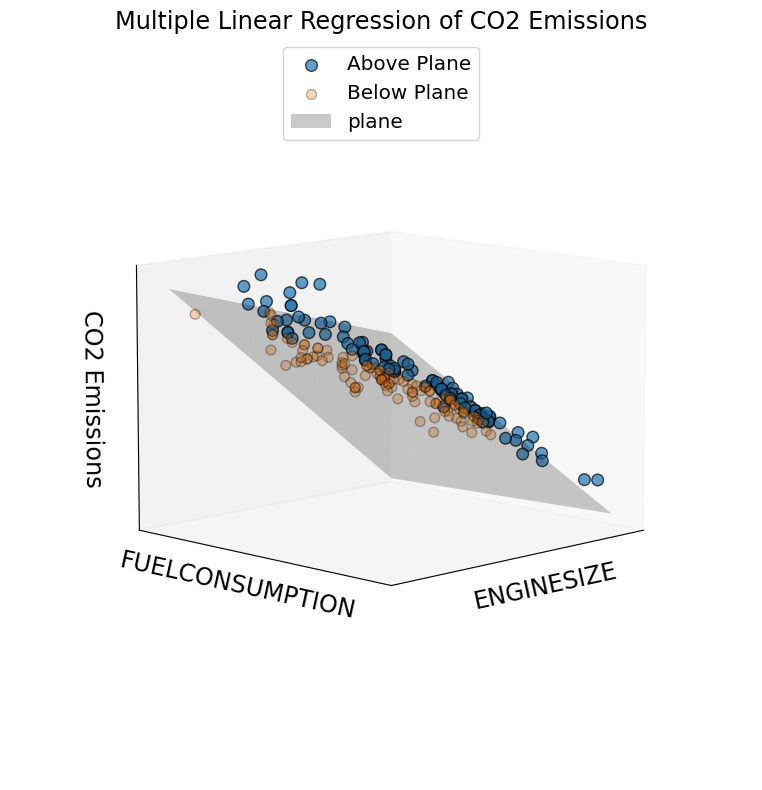

In [172]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] #if X_test.ndim > 1 else X_test.to_numpy()
X2 = X_test[:, 1] #if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0] * x1_surf  +  coef_[1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regr.predict(X_test) if X_test.ndim == 1 else regr.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane
below_plane = below_plane

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d', elev=60, azim=45)

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

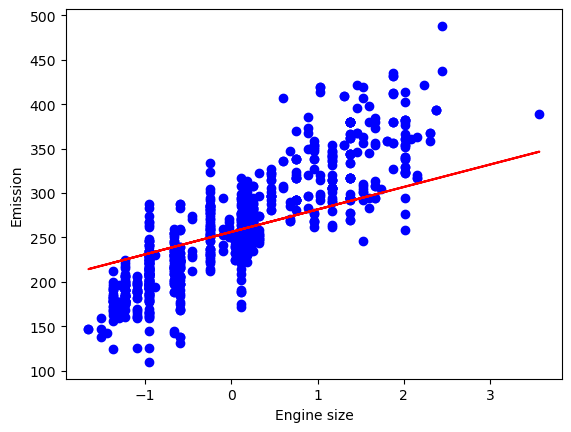

In [179]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0] * X_train[:,0] + intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

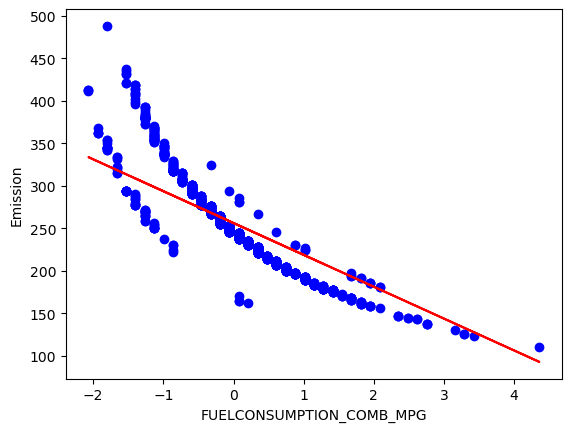

In [182]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[1] * X_train[:,1] + intercept_, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

In [41]:
def regression_results(y_true, y_pred, regr_type):

    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)
    
    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4)) 
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()


In [78]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
yhat_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
yhat_lasso = lasso.predict(X_test)

regression_results(y_test, y_hat1, 'Ordinary')
regression_results(y_test, yhat_ridge, 'Ridge')
regression_results(y_test, yhat_lasso, 'Lasso')

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.8873
r2:  0.8873
MAE:  14.2858
MSE:  466.1131
RMSE:  21.5897

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.8874
r2:  0.8873
MAE:  14.2835
MSE:  465.8631
RMSE:  21.5839

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.8873
r2:  0.8873
MAE:  14.2859
MSE:  466.1117
RMSE:  21.5896



8.66 5 0.9190885756720998


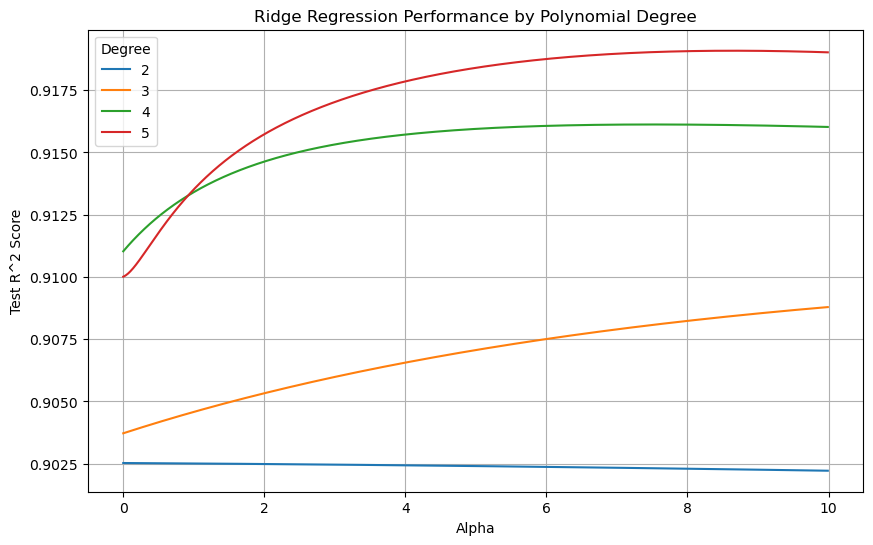

In [189]:
results_ridge = []
order = [2, 3, 4, 5]
alpha = np.arange(0, 10, 0.01)

for i in order:
    pr = PolynomialFeatures(degree=i)
    X_train_pr = pr.fit_transform(X_train)
    X_test_pr = pr.transform(X_test)
    
    for j in alpha:
        RR = Ridge(alpha=j)
        RR.fit(X_train_pr, y_train)
        test_score = RR.score(X_test_pr, y_test)
        train_score = RR.score(X_train_pr, y_train)
        results_ridge.append({'degree': i,'alpha': j,'r2_train': train_score,'r2_test': test_score})
        if test_score == max([r["r2_test"] for r in results_ridge]):
            ar = j
            br = i
            max_r2 = test_score

print(ar, br, max_r2)


# Create DataFrame for plotting
df = pd.DataFrame(results_ridge)

# Plot test R^2 vs alpha for each polynomial degree
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='alpha', y='r2_test', hue='degree', palette='tab10')
plt.xlabel('Alpha')
plt.ylabel('Test R^2 Score')
plt.title('Ridge Regression Performance by Polynomial Degree')
plt.legend(title='Degree')
plt.grid(True)
plt.show()


0.12 5 0.9186403910220999


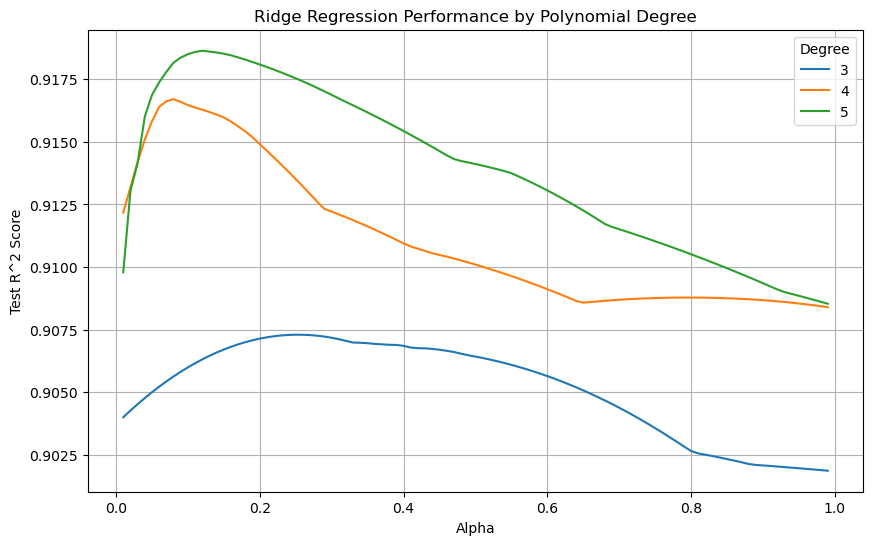

In [213]:
results_lasso = []
order = [3, 4, 5]
alpha = np.arange(0.01, 1, 0.01)

for i in order:
    pr = PolynomialFeatures(degree=i)
    X_train_pr = pr.fit_transform(X_train)
    X_test_pr = pr.transform(X_test)
    
    for j in alpha:
        LL = Lasso(alpha=j, max_iter=10000)
        LL.fit(X_train_pr, y_train)
        test_score = LL.score(X_test_pr, y_test)
        train_score = LL.score(X_train_pr, y_train)
        results_lasso.append({'degree': i,'alpha': j,'r2_train': train_score,'r2_test': test_score})
        if test_score == max([r["r2_test"] for r in results_lasso]):
            al = j
            bl = i
            max_r2 = test_score

print(al, bl, max_r2)

# Create DataFrame for plotting
df = pd.DataFrame(results_lasso)

# Plot test R^2 vs alpha for each polynomial degree
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='alpha', y='r2_test', hue='degree', palette='tab10')
plt.xlabel('Alpha')
plt.ylabel('Test R^2 Score')
plt.title('Ridge Regression Performance by Polynomial Degree')
plt.legend(title='Degree')
plt.grid(True)
plt.show()


4 0.9110302392386286


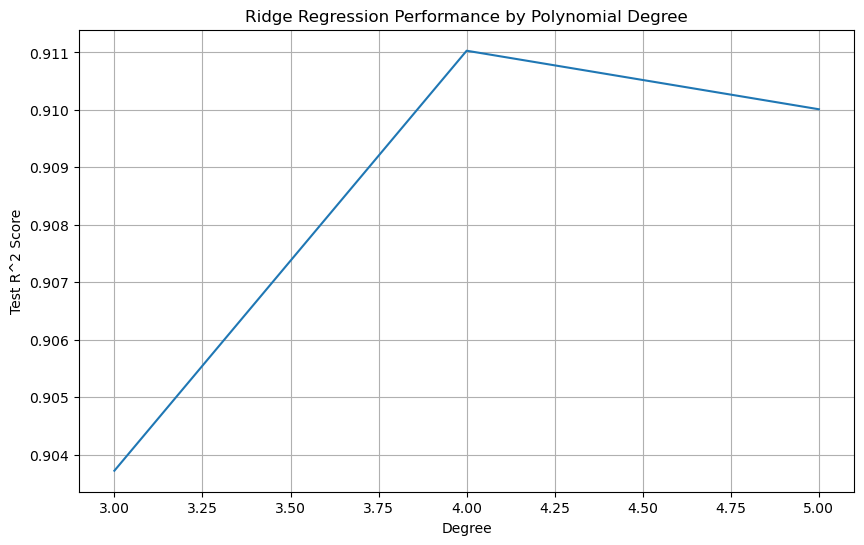

In [223]:
results_linear = []
order = [3, 4, 5]

for i in order:
    pr = PolynomialFeatures(degree=i)
    X_train_pr = pr.fit_transform(X_train)
    X_test_pr = pr.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_pr, y_train)
    test_score = LR.score(X_test_pr, y_test)
    train_score = LR.score(X_train_pr, y_train)
    results_linear.append({'degree': i,'r2_train': train_score,'r2_test': test_score})
    if test_score == max([r["r2_test"] for r in results_linear]):
        blr = i
        max_r2 = test_score

print(blr, max_r2)


# Create DataFrame for plotting
df = pd.DataFrame(results_linear)

# Plot test R^2 vs alpha for each polynomial degree
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, y='r2_test', x='degree')
plt.xlabel('Degree')
plt.ylabel('Test R^2 Score')
plt.title('Ridge Regression Performance by Polynomial Degree')
plt.grid(True)
plt.show()
